## Wine Quality Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

#### Reading the data

In [2]:
df = pd.read_csv("C:/Users/Daksha/Downloads/winequalityN.csv")

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


#### Statistics from the data

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#### Check for null values

In [6]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
df[df['fixed acidity'].isnull()].head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,white,NaN,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
174,white,NaN,0.270,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5
249,white,NaN,0.410,0.14,10.4,0.037,18.0,119.0,0.99600,3.38,0.45,10.0,5
267,white,NaN,0.580,0.07,6.9,0.043,34.0,149.0,0.99440,3.34,0.57,9.7,5
368,white,NaN,0.290,0.48,2.3,0.049,36.0,178.0,0.99310,3.17,0.64,10.6,6
518,white,NaN,0.130,0.28,1.9,0.050,20.0,78.0,0.99180,3.43,0.64,10.8,6
1079,white,NaN,NaN,0.29,6.2,0.046,29.0,227.0,0.99520,3.29,0.53,10.1,6
2902,white,NaN,0.360,0.14,8.9,0.036,38.0,155.0,0.99622,3.27,NaN,9.4,5
6428,red,NaN,0.440,0.09,2.2,0.063,9.0,18.0,0.99444,NaN,0.69,11.3,6
6429,red,NaN,0.705,0.10,2.8,0.081,13.0,28.0,0.99631,NaN,0.66,10.2,5


### Let us replace null values with mean of all the values from the category

In [8]:
for col, value in df.items():
    if col != 'type':
        df[col]=df[col].fillna(df[col].mean())

In [9]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Checking for outliers

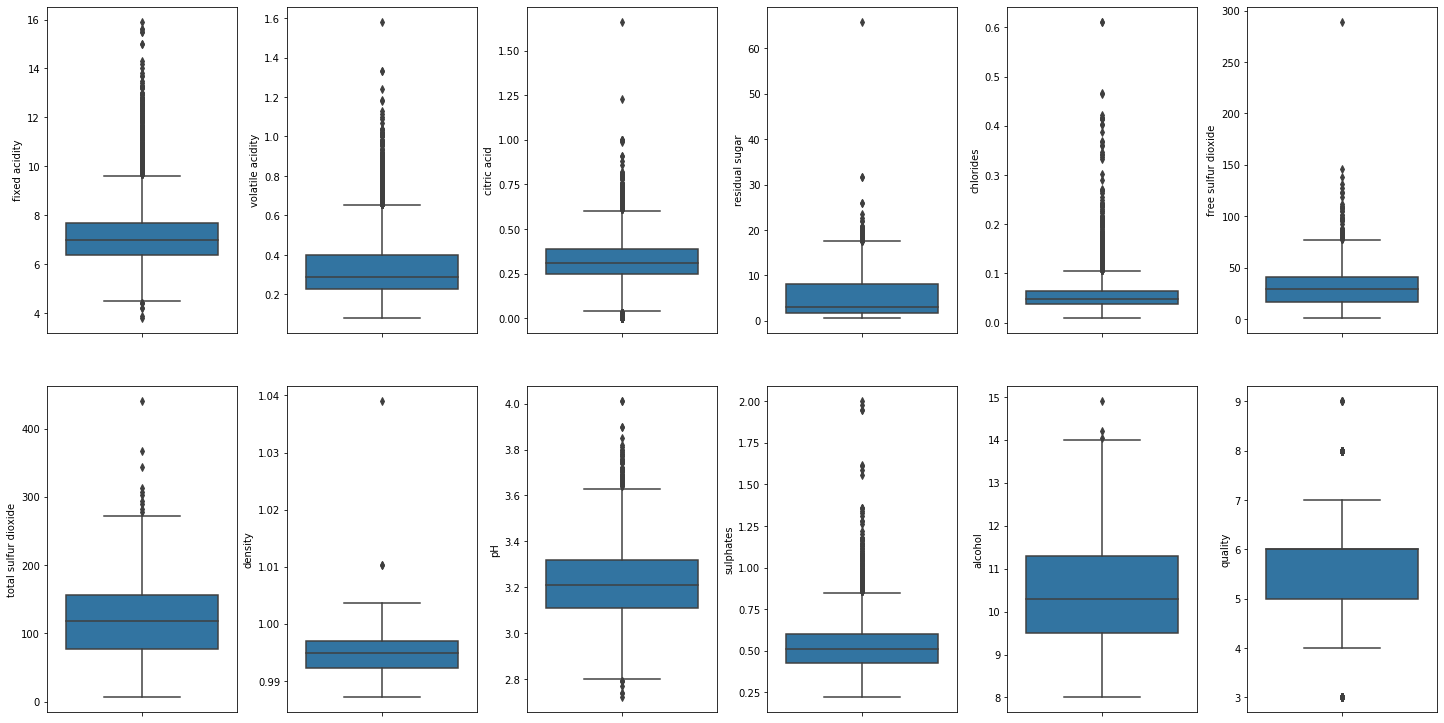

In [10]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

### Imputing outliers with median of each column

In [11]:
def outlier(column):
    quan = df[column].quantile(0.50) 
    quan2 =df[column].quantile(0.75) 
    df[column] = np.where(df[column] > quan2, quan, df[column])
    df.describe()

In [12]:
lst = {'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
       'density', 'pH', 'sulphates', 'alcohol', 'quality'}
for i in lst:
    outlier(i)

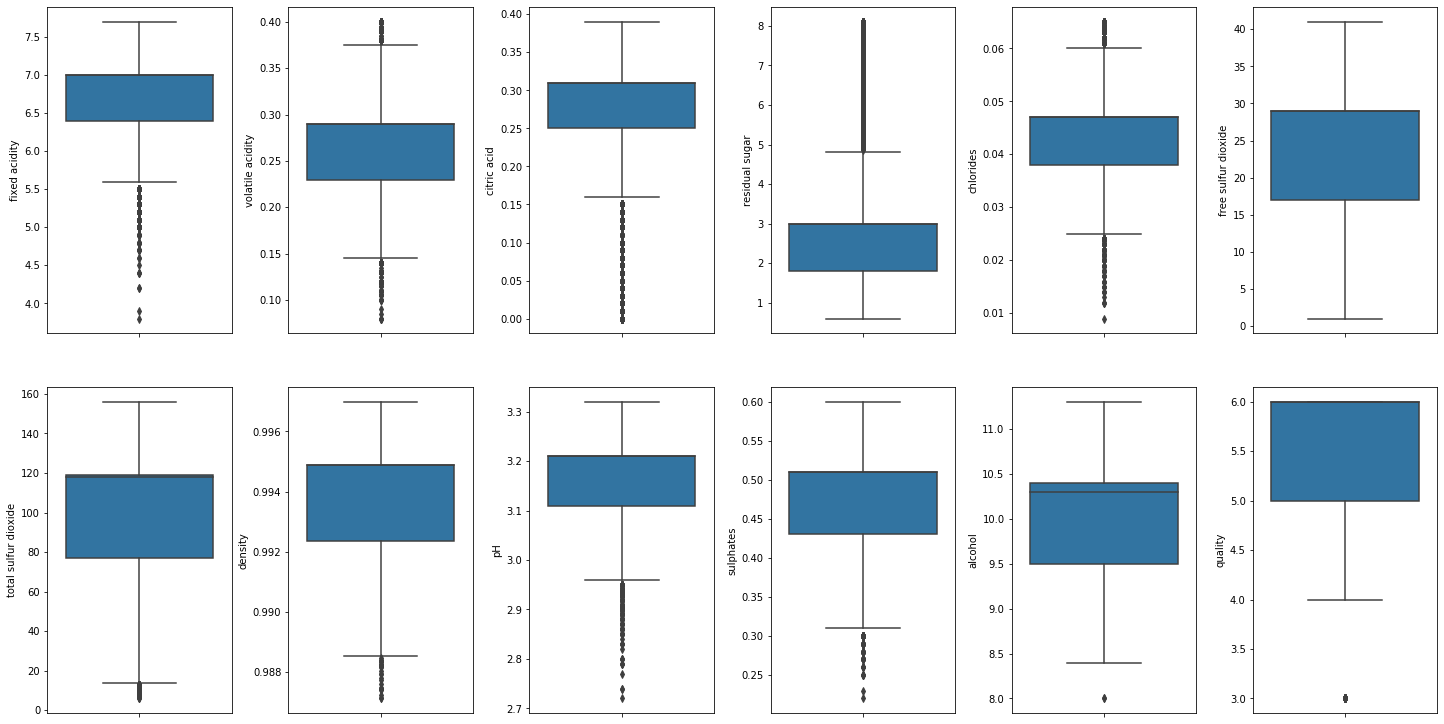

In [13]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

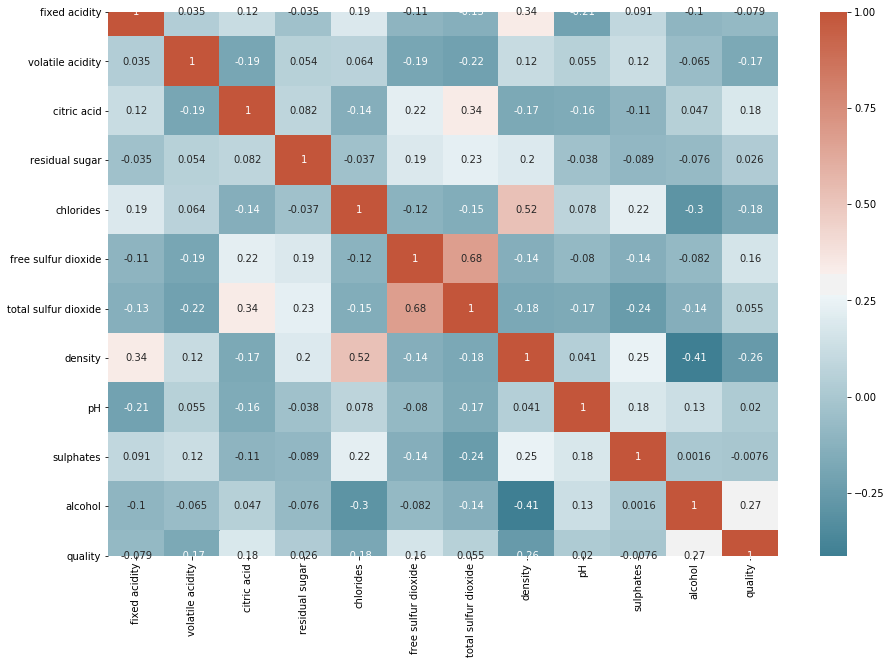

In [14]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

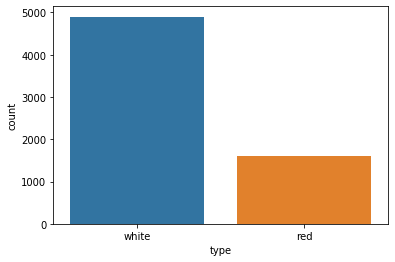

In [15]:
sns.countplot(df['type'])

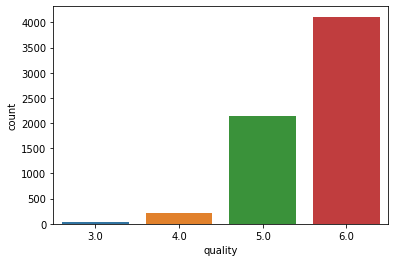

In [16]:
sns.countplot(df['quality'])

### The output class is imbalanced so let us balance it using SMOTE

In [17]:
df['quality'] = df['quality'].astype(int)

In [18]:
df['quality'].value_counts()

6    4113
5    2138
4     216
3      30
Name: quality, dtype: int64

In [19]:
X = df.drop(columns=['type', 'quality'])
Y = df['quality']

In [20]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=5)
# transform the dataset
X, Y = oversample.fit_resample(X, Y)

In [21]:
Y.value_counts()

6    4113
5    4113
4    4113
3    4113
Name: quality, dtype: int64

### Feature Scaling

In [22]:
from sklearn.preprocessing import PowerTransformer
X = PowerTransformer(method = 'yeo-johnson').fit_transform(X)
X

array([[ 0.32590339, -0.19976422,  1.57785858, ..., -1.55306467,
        -0.49726831, -1.79695809],
       [-1.08937584,  0.43253727,  1.15650678, ...,  1.89666223,
         0.13190797, -0.76157721],
       [ 0.32590339,  0.0060096 ,  0.60236752, ...,  1.17656107,
        -0.6398368 ,  0.18313178],
       ...,
       [ 0.32590339,  0.21675011, -1.29607766, ...,  1.00543082,
         0.66441358, -0.0664703 ],
       [ 0.3571499 ,  0.21675011, -1.84374976, ...,  1.0074041 ,
         0.29875621, -0.29034007],
       [-1.49486193,  0.83044886,  0.60236752, ..., -0.17107315,
        -0.49726831, -0.67026881]])

## Model training

### Split dataset into train and test

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.20, random_state=1)

### Function to utilize different algorithms

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

def classify(model, X, Y):
    # train the model
    model.fit(X_train, Y_train)
    score = model.predict(X_test)
    print(classification_report(Y_test,score))
    print(confusion_matrix(Y_test, score))

    # cross-validation
    score = cross_val_score(model, X, Y, cv=5)
    print("CV Score:", np.mean(score)*100)

In [25]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
classify(model1, X, Y)

              precision    recall  f1-score   support

           3       0.42      0.36      0.39       817
           4       0.52      0.46      0.49       817
           5       0.42      0.44      0.43       838
           6       0.47      0.57      0.51       819

    accuracy                           0.46      3291
   macro avg       0.46      0.46      0.46      3291
weighted avg       0.46      0.46      0.45      3291

[[298  76 176 267]
 [164 374 186  93]
 [126 180 366 166]
 [121  91 141 466]]
CV Score: 43.726826132613674


In [26]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
classify(model2, X, Y)

              precision    recall  f1-score   support

           3       0.95      0.98      0.96       817
           4       0.89      0.90      0.90       817
           5       0.78      0.74      0.76       838
           6       0.77      0.78      0.78       819

    accuracy                           0.85      3291
   macro avg       0.85      0.85      0.85      3291
weighted avg       0.85      0.85      0.85      3291

[[801   2   5   9]
 [ 11 735  38  33]
 [ 18  57 619 144]
 [ 15  30 134 640]]
CV Score: 77.44350208129568


In [27]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
classify(model3, X, Y)

              precision    recall  f1-score   support

           3       0.99      1.00      0.99       817
           4       0.94      0.97      0.96       817
           5       0.86      0.83      0.84       838
           6       0.87      0.87      0.87       819

    accuracy                           0.92      3291
   macro avg       0.92      0.92      0.92      3291
weighted avg       0.91      0.92      0.92      3291

[[817   0   0   0]
 [  3 794  12   8]
 [  5  39 694 100]
 [  2   9  99 709]]
CV Score: 84.50641013208168


In [28]:
from sklearn.ensemble import ExtraTreesClassifier
model4 = ExtraTreesClassifier()
classify(model4, X, Y)

              precision    recall  f1-score   support

           3       0.99      1.00      1.00       817
           4       0.96      0.99      0.97       817
           5       0.87      0.86      0.86       838
           6       0.89      0.86      0.87       819

    accuracy                           0.93      3291
   macro avg       0.93      0.93      0.93      3291
weighted avg       0.93      0.93      0.93      3291

[[817   0   0   0]
 [  0 806  10   1]
 [  3  28 720  87]
 [  3   9 102 705]]
CV Score: 85.66731409878095


In [29]:
import xgboost as xgb
model5 = xgb.XGBClassifier()
classify(model5, X, Y)

              precision    recall  f1-score   support

           3       0.99      1.00      1.00       817
           4       0.94      0.98      0.96       817
           5       0.85      0.80      0.83       838
           6       0.86      0.87      0.86       819

    accuracy                           0.91      3291
   macro avg       0.91      0.91      0.91      3291
weighted avg       0.91      0.91      0.91      3291

[[817   0   0   0]
 [  1 797  12   7]
 [  4  47 674 113]
 [  0   3 105 711]]
CV Score: 83.17538391061927


In [30]:
import lightgbm 
model6 = lightgbm.LGBMClassifier()
classify(model6, X, Y)

              precision    recall  f1-score   support

           3       0.99      1.00      1.00       817
           4       0.91      0.95      0.93       817
           5       0.82      0.77      0.79       838
           6       0.84      0.84      0.84       819

    accuracy                           0.89      3291
   macro avg       0.89      0.89      0.89      3291
weighted avg       0.89      0.89      0.89      3291

[[817   0   0   0]
 [  5 779  22  11]
 [  2  69 645 122]
 [  0   7 122 690]]
CV Score: 82.23321779302306


In [31]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
classify(ada,X,Y)

              precision    recall  f1-score   support

           3       0.68      0.76      0.72       817
           4       0.58      0.51      0.54       817
           5       0.49      0.50      0.50       838
           6       0.69      0.67      0.68       819

    accuracy                           0.61      3291
   macro avg       0.61      0.61      0.61      3291
weighted avg       0.61      0.61      0.61      3291

[[625  84  79  29]
 [149 413 200  55]
 [ 87 168 421 162]
 [ 60  51 157 551]]
CV Score: 54.80774406389721


In [32]:
from sklearn.svm import SVC
svm = SVC()
classify(svm,X,Y)

              precision    recall  f1-score   support

           3       0.89      1.00      0.94       817
           4       0.80      0.84      0.82       817
           5       0.70      0.63      0.66       838
           6       0.79      0.72      0.75       819

    accuracy                           0.80      3291
   macro avg       0.79      0.80      0.79      3291
weighted avg       0.79      0.80      0.79      3291

[[814   1   2   0]
 [ 33 684  76  24]
 [ 37 133 532 136]
 [ 32  42 153 592]]
CV Score: 74.40419898054841


In [33]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
classify(naive,X,Y)

              precision    recall  f1-score   support

           3       0.43      0.43      0.43       817
           4       0.58      0.36      0.44       817
           5       0.42      0.50      0.46       838
           6       0.51      0.60      0.55       819

    accuracy                           0.47      3291
   macro avg       0.49      0.47      0.47      3291
weighted avg       0.49      0.47      0.47      3291

[[355  56 183 223]
 [188 295 233 101]
 [170 101 418 149]
 [106  57 164 492]]
CV Score: 45.580698580174904


## We get best accuracy from extra trees classifier with an accuracy of 93%